In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("Mushroom.csv")
data

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



In [3]:
data.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [4]:
data.drop("stalk-root",axis=1,inplace=True)

In [5]:
data.shape

(8124, 22)

In [6]:
for col in data.columns:
    data[col]=pd.factorize(data[col])[0]

In [7]:
data

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,0,0,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,0,0,1,3,1,0,1,10,0,...,6,7,0,2,0,0,8,5,6,1
8120,0,0,0,1,3,1,0,1,10,0,...,6,7,0,1,0,0,8,3,6,1
8121,3,0,0,1,3,1,0,1,1,0,...,6,7,0,2,0,0,8,5,6,1
8122,4,1,0,1,6,0,0,0,8,1,...,0,0,0,0,0,1,4,3,6,0


In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=8)
df=pca.fit_transform(data.iloc[:,0:-1])
df.shape

(8124, 8)

In [9]:
df=pd.DataFrame(df)

In [10]:
df[8]=data.iloc[:,-1]

In [11]:
df

,0,1,2,3,4,5,6,7,8
0,-7.264042,0.179998,-2.156707,-0.847009,-0.810280,1.780710,0.269861,-0.389764,0
1,-6.060013,0.382837,-0.956571,-0.393417,-0.810990,1.144902,1.179121,-0.438698,1
2,-4.593662,-0.331118,-0.137758,0.053494,-0.040826,0.748416,1.305735,0.009339,1
3,-6.605869,-0.437968,-0.419599,-0.198629,-0.926551,2.013688,-0.488451,-0.569243,0
4,-5.025157,0.177580,1.417155,-0.444993,-0.854297,-0.144096,1.032977,0.823027,1
...,...,...,...,...,...,...,...,...,...
8119,9.707937,4.020886,-3.263367,3.077810,1.355222,4.748645,0.942406,-0.168595,1
8120,8.756817,3.743488,-3.241074,2.511577,-2.698225,5.425631,1.458294,0.332376,1
8121,3.620754,8.320561,-1.635987,2.020213,1.723798,2.866740,5.037025,0.573682,1
8122,5.206989,-2.455847,-2.092698,-1.289244,1.561062,-1.991990,1.363468,-0.834499,0


In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8124.000000
mean,-4.418808e-15,8.243310e-16,1.594545e-16,-3.582669e-16,5.849033e-16,-2.399744e-16,-6.145926e-16,1.917267e-16,0.517971
std,3.532167e+00,2.256807e+00,1.764588e+00,1.680109e+00,1.533008e+00,1.256380e+00,1.125309e+00,9.621092e-01,0.499708
min,-7.306304e+00,-4.126149e+00,-4.312138e+00,-4.237015e+00,-3.007208e+00,-2.779656e+00,-4.220359e+00,-3.222150e+00,0.000000
25%,-2.770556e+00,-1.631449e+00,-1.703303e+00,-1.295357e+00,-1.429936e+00,-8.839247e-01,-7.428985e-01,-5.370479e-01,0.000000
50%,-3.908400e-01,-5.326240e-01,1.007978e-01,-2.606273e-01,6.392211e-02,-2.168546e-01,-3.481734e-03,1.130803e-02,1.000000
75%,3.065944e+00,1.036099e+00,1.409515e+00,1.360584e+00,1.507343e+00,7.018453e-01,7.305478e-01,5.291307e-01,1.000000
max,1.036944e+01,8.518916e+00,7.014336e+00,5.510058e+00,3.631864e+00,5.840224e+00,5.525275e+00,4.340075e+00,1.000000


In [13]:
df.skew()

0    0.293400
1    0.987042
2    0.159281
3    0.298177
4   -0.038862
5    0.983733
6    0.302998
7    0.117083
8   -0.071946
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2653a739d30>,
 'caps': [<matplotlib.lines.Line2D at 0x2653a74e430>,
 'boxes': [<matplotlib.lines.Line2D at 0x2653a7399d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2653a74eaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2653a74edf0>],
 'means': []}

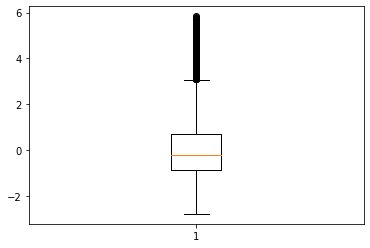

In [14]:
plt.boxplot(df[5])

In [15]:
z=np.abs(zscore(df))
np.where(z>3)

(array([  59,  140,  189,  240,  356,  358,  439,  442,  459,  522,  529,
         530,  888, 1040, 1690, 4165, 4326, 4491, 4898, 5178, 5185, 5231,
        5284, 5302, 5335, 5351, 5384, 5430, 5434, 5497, 5528, 5551, 5586,
        5598, 5620, 5666, 5674, 5702, 5733, 5748, 5764, 5773, 5776, 5847,
        5970, 6038, 6120, 6375, 6415, 6415, 6424, 6424, 6434, 6434, 6558,
        6558, 6663, 6668, 6668, 6668, 6763, 6849, 6849, 6855, 6855, 6900,
        6900, 6904, 6905, 6905, 6910, 6927, 6945, 6945, 6989, 6991, 6991,
        6994, 6999, 7025, 7026, 7033, 7034, 7034, 7034, 7036, 7036, 7037,
        7051, 7054, 7065, 7065, 7073, 7079, 7090, 7091, 7091, 7100, 7100,
        7100, 7111, 7111, 7128, 7128, 7133, 7135, 7146, 7146, 7146, 7166,
        7166, 7173, 7176, 7176, 7181, 7182, 7188, 7205, 7221, 7228, 7228,
        7230, 7230, 7233, 7235, 7235, 7239, 7239, 7244, 7246, 7251, 7253,
        7265, 7265, 7281, 7285, 7285, 7290, 7299, 7306, 7306, 7323, 7323,
        7325, 7327, 7336, 7336, 7342, 

In [16]:
mash=df[(z<3).all(axis=1)]
mash

,0,1,2,3,4,5,6,7,8
0,-7.264042,0.179998,-2.156707,-0.847009,-0.810280,1.780710,0.269861,-0.389764,0
1,-6.060013,0.382837,-0.956571,-0.393417,-0.810990,1.144902,1.179121,-0.438698,1
2,-4.593662,-0.331118,-0.137758,0.053494,-0.040826,0.748416,1.305735,0.009339,1
3,-6.605869,-0.437968,-0.419599,-0.198629,-0.926551,2.013688,-0.488451,-0.569243,0
4,-5.025157,0.177580,1.417155,-0.444993,-0.854297,-0.144096,1.032977,0.823027,1
...,...,...,...,...,...,...,...,...,...
8113,5.134354,-1.229680,2.028494,-1.639725,1.507068,-0.092298,-1.303600,0.084352,0
8116,5.971753,-1.556893,-1.946998,-1.342232,1.437275,-2.209693,1.049226,0.245656,0
8117,4.553944,-2.530373,1.672746,-0.346374,1.614197,0.495773,-0.511783,1.255887,0
8118,3.787435,-1.721341,-2.374733,-0.791908,1.718188,0.586369,-0.675110,0.004210,0


In [17]:
mash.skew()

0    0.171706
1    0.802104
2   -0.024625
3    0.273387
4   -0.036697
5    0.539269
6    0.008007
7   -0.109846
8   -0.026484
dtype: float64

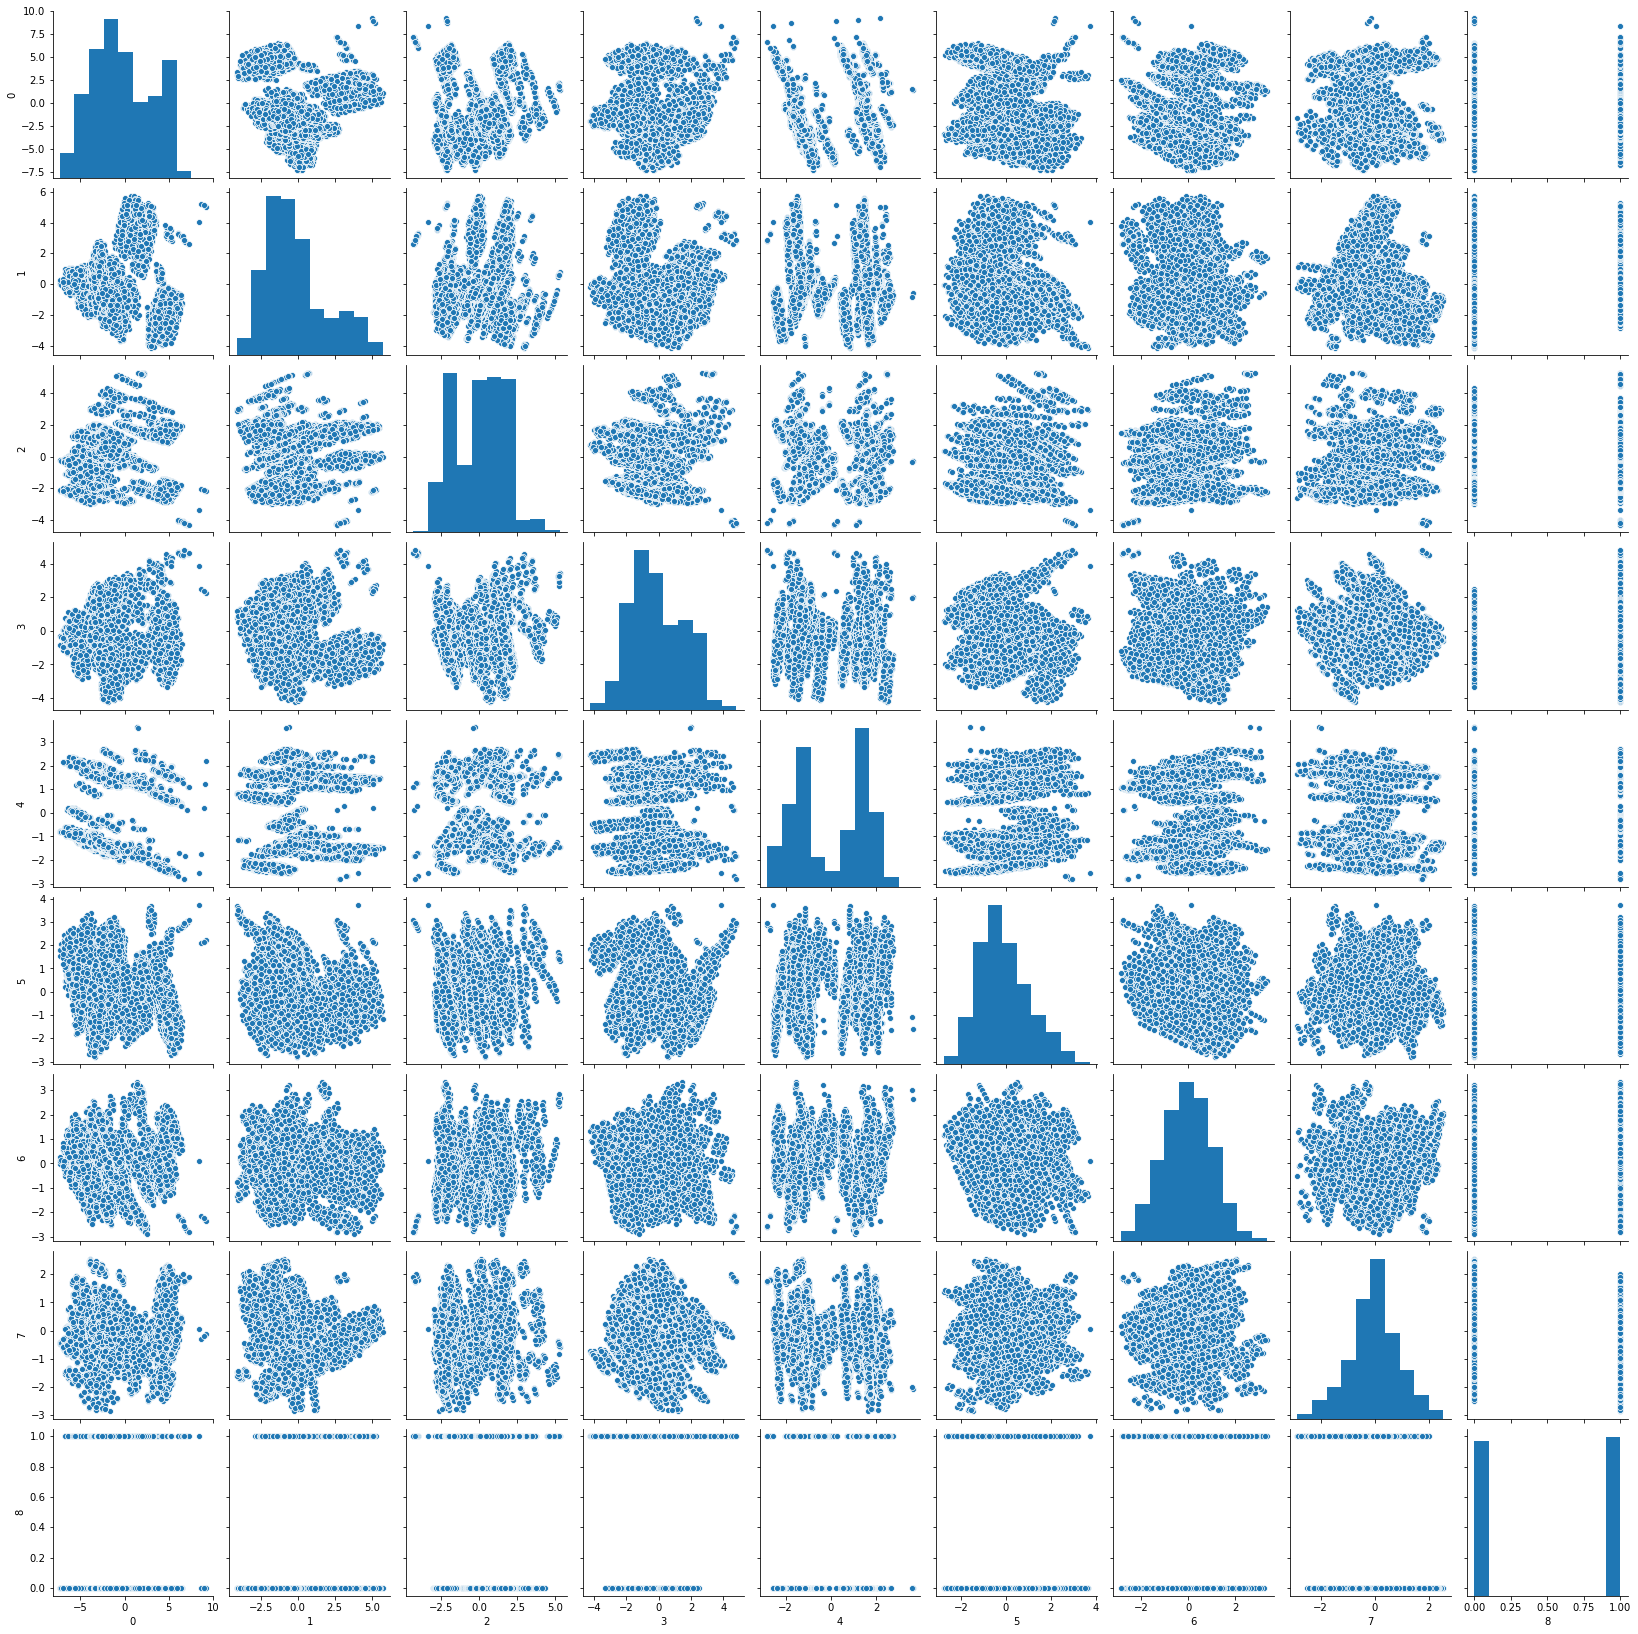

In [18]:
sns.pairplot(mash)

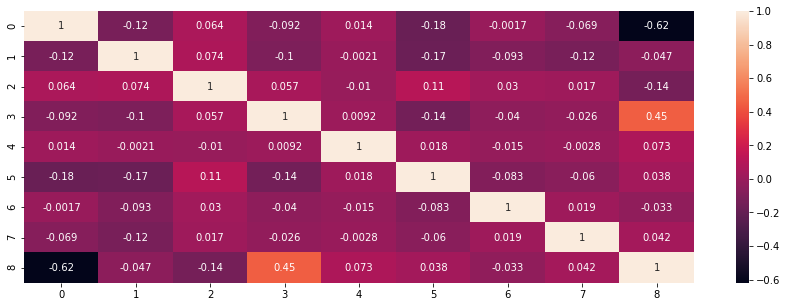

In [19]:
plt.figure(figsize=(15,5))
sns.heatmap(mash.corr(),annot=True)

In [20]:
x=mash.iloc[:,0:-1]
y=mash.iloc[:,-1]
y

0       0
1       1
2       1
3       0
4       1
       ..
8113    0
8116    0
8117    0
8118    0
8122    0
Name: 8, Length: 7856, dtype: int64

In [27]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),SVC(),SVC(kernel="poly")]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=41)


In [28]:
for i in model:
    print("-----------------------",i,"---------------")
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(i.score(x_train,y_train))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("\n")

----------------------- DecisionTreeClassifier() ---------------
0.9818742768993444
1.0
[[1268   27]
 [  20 1278]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1295
           1       0.98      0.98      0.98      1298

    accuracy                           0.98      2593
   macro avg       0.98      0.98      0.98      2593
weighted avg       0.98      0.98      0.98      2593



----------------------- KNeighborsClassifier() ---------------
0.9996143463170073
0.999049971499145
[[1294    1]
 [   0 1298]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1295
           1       1.00      1.00      1.00      1298

    accuracy                           1.00      2593
   macro avg       1.00      1.00      1.00      2593
weighted avg       1.00      1.00      1.00      2593



----------------------- SVC() ---------------
0.9930582337061319
0.9904997149914497
[[1284   11]
 [ 